## Import Data ##

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private


In [4]:
df = df.drop(columns=["Startup Name"])

In [6]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [62]:
def drop():
    global X
    global y
    
    X = df.drop(columns=["Exit Status"])
    y = df["Exit Status"]

In [10]:
df

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,7,1,101.09,844.75,67.87,1468,5.20,0,2006,2,2
1,3,1,247.62,3310.83,75.65,3280,8.10,1,2003,4,2
2,3,1,109.24,1059.37,84.21,4933,2.61,1,1995,4,2
3,5,5,10.75,101.90,47.08,1059,2.53,0,2003,4,2
4,7,4,249.28,850.11,50.25,1905,4.09,0,1997,2,0
...,...,...,...,...,...,...,...,...,...,...,...
495,3,2,181.86,2378.65,59.64,3331,0.58,1,1993,2,2
496,0,2,107.34,1394.58,10.22,2223,5.85,0,2019,4,2
497,2,1,160.29,502.09,84.73,2222,4.32,0,2019,1,2
498,5,5,234.65,2814.52,53.16,4972,5.53,0,2011,2,2


## Data Clean Up ##

In [12]:
stats.zscore(df) #Find outliers

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,1.596451,-1.360170,-0.595480,-0.539330,0.634382,-0.768825,0.038170,-0.872103,-0.004712,0.053013,0.629243
1,-0.205412,-1.360170,1.096611,1.984165,0.900471,0.540377,1.072098,1.146654,-0.325988,1.485785,0.629243
2,-0.205412,-1.360170,-0.501366,-0.319713,1.193237,1.734699,-0.885235,1.146654,-1.182723,1.485785,0.629243
3,0.695519,1.418522,-1.638703,-1.299475,-0.076671,-1.064335,-0.913757,-0.872103,-0.325988,1.485785,0.629243
4,1.596451,0.723849,1.115781,-0.533845,0.031748,-0.453085,-0.357575,-0.872103,-0.968539,0.053013,-1.800268
...,...,...,...,...,...,...,...,...,...,...,...
495,-0.205412,-0.665497,0.337232,1.030282,0.352902,0.577225,-1.608985,1.146654,-1.396906,0.053013,0.629243
496,-1.556810,-0.665497,-0.523306,0.023301,-1.337346,-0.223324,0.269912,-0.872103,1.387482,1.485785,0.629243
497,-0.655878,-1.360170,0.088147,-0.889968,1.211022,-0.224047,-0.275574,-0.872103,1.387482,-0.663373,0.629243
498,0.695519,1.418522,0.946837,1.476300,0.131275,1.762877,0.155824,-0.872103,0.530747,0.053013,0.629243


In [14]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(499, 11)

In [16]:
df.isna().sum()

Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [18]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

drop()

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [72]:
drop()
df

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,7,1,101.09,844.75,67.87,1468,5.20,0,2006,2,2
1,3,1,247.62,3310.83,75.65,3280,8.10,1,2003,4,2
2,3,1,109.24,1059.37,84.21,4933,2.61,1,1995,4,2
3,5,5,10.75,101.90,47.08,1059,2.53,0,2003,4,2
4,7,4,249.28,850.11,50.25,1905,4.09,0,1997,2,0
...,...,...,...,...,...,...,...,...,...,...,...
494,3,2,181.86,2378.65,59.64,3331,0.58,1,1993,2,2
495,0,2,107.34,1394.58,10.22,2223,5.85,0,2019,4,2
496,2,1,160.29,502.09,84.73,2222,4.32,0,2019,1,2
497,5,5,234.65,2814.52,53.16,4972,5.53,0,2011,2,2


## Statistical Modeling ##

In [74]:
df.describe()

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.452906,2.959920,152.375010,1365.825852,49.325431,2529.148297,5.097074,0.432866,2006.012024,1.929860,1.480962
std,2.223299,1.441774,86.541221,970.006560,29.296859,1385.259110,2.808939,0.495970,9.329093,1.396025,0.824535
min,0.000000,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000,0.000000,0.000000
25%,2.000000,2.000000,78.955000,555.645000,22.785000,1382.500000,2.760000,0.000000,1998.000000,1.000000,1.000000
50%,3.000000,3.000000,155.720000,1215.870000,48.890000,2495.000000,5.150000,0.000000,2006.000000,2.000000,2.000000
75%,5.000000,4.000000,225.550000,2049.400000,74.980000,3706.500000,7.555000,1.000000,2014.000000,3.000000,2.000000
max,7.000000,5.000000,299.810000,4264.900000,99.710000,4984.000000,10.000000,1.000000,2022.000000,4.000000,2.000000


In [76]:
df.corr()

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
Industry,1.000000,0.036996,-0.032084,-0.009285,-0.056261,0.077546,0.040237,0.009419,-0.021949,0.042604,0.009094
Funding Rounds,0.036996,1.000000,-0.048206,-0.064380,0.014461,0.028163,-0.015281,0.032735,-0.012206,-0.017362,0.038207
Funding Amount (M USD),-0.032084,-0.048206,1.000000,0.794670,0.033397,0.038844,0.064800,0.007656,-0.042756,0.031396,-0.048579
Valuation (M USD),-0.009285,-0.064380,0.794670,1.000000,0.059161,0.008248,0.109135,0.098842,-0.031956,0.040624,-0.044597
Revenue (M USD),-0.056261,0.014461,0.033397,0.059161,1.000000,0.013203,-0.012612,0.032073,-0.059173,0.001146,0.074502
Employees,0.077546,0.028163,0.038844,0.008248,0.013203,1.000000,0.032556,0.005980,0.007789,0.063435,-0.045900
Market Share (%),0.040237,-0.015281,0.064800,0.109135,-0.012612,0.032556,1.000000,0.114706,-0.005930,-0.013592,-0.014581
Profitable,0.009419,0.032735,0.007656,0.098842,0.032073,0.005980,0.114706,1.000000,0.022308,-0.103970,-0.038731
Year Founded,-0.021949,-0.012206,-0.042756,-0.031956,-0.059173,0.007789,-0.005930,0.022308,1.000000,-0.021983,0.039709
Region,0.042604,-0.017362,0.031396,0.040624,0.001146,0.063435,-0.013592,-0.103970,-0.021983,1.000000,0.038089


In [78]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([1.25792249e-291, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.00426175e-116,
       0.00000000e+000, 4.03479196e-197])

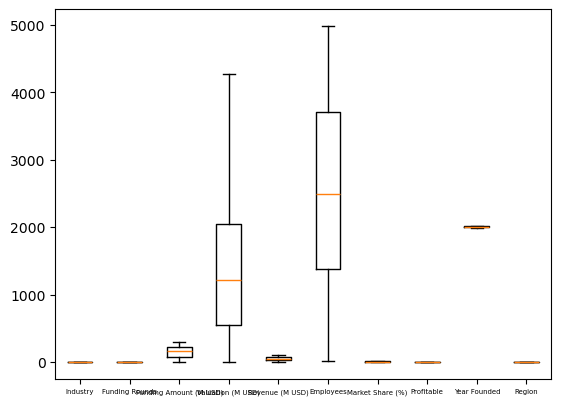

In [80]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

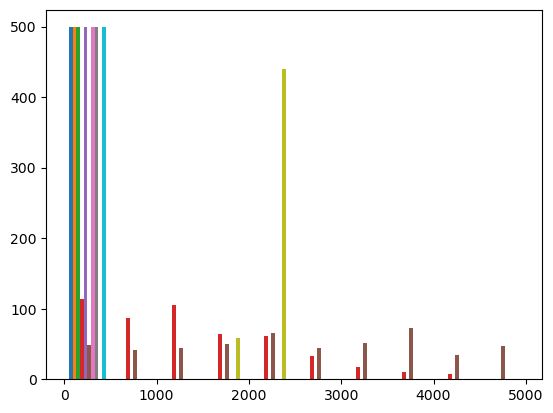

In [82]:
plt.hist(X)
plt.show()

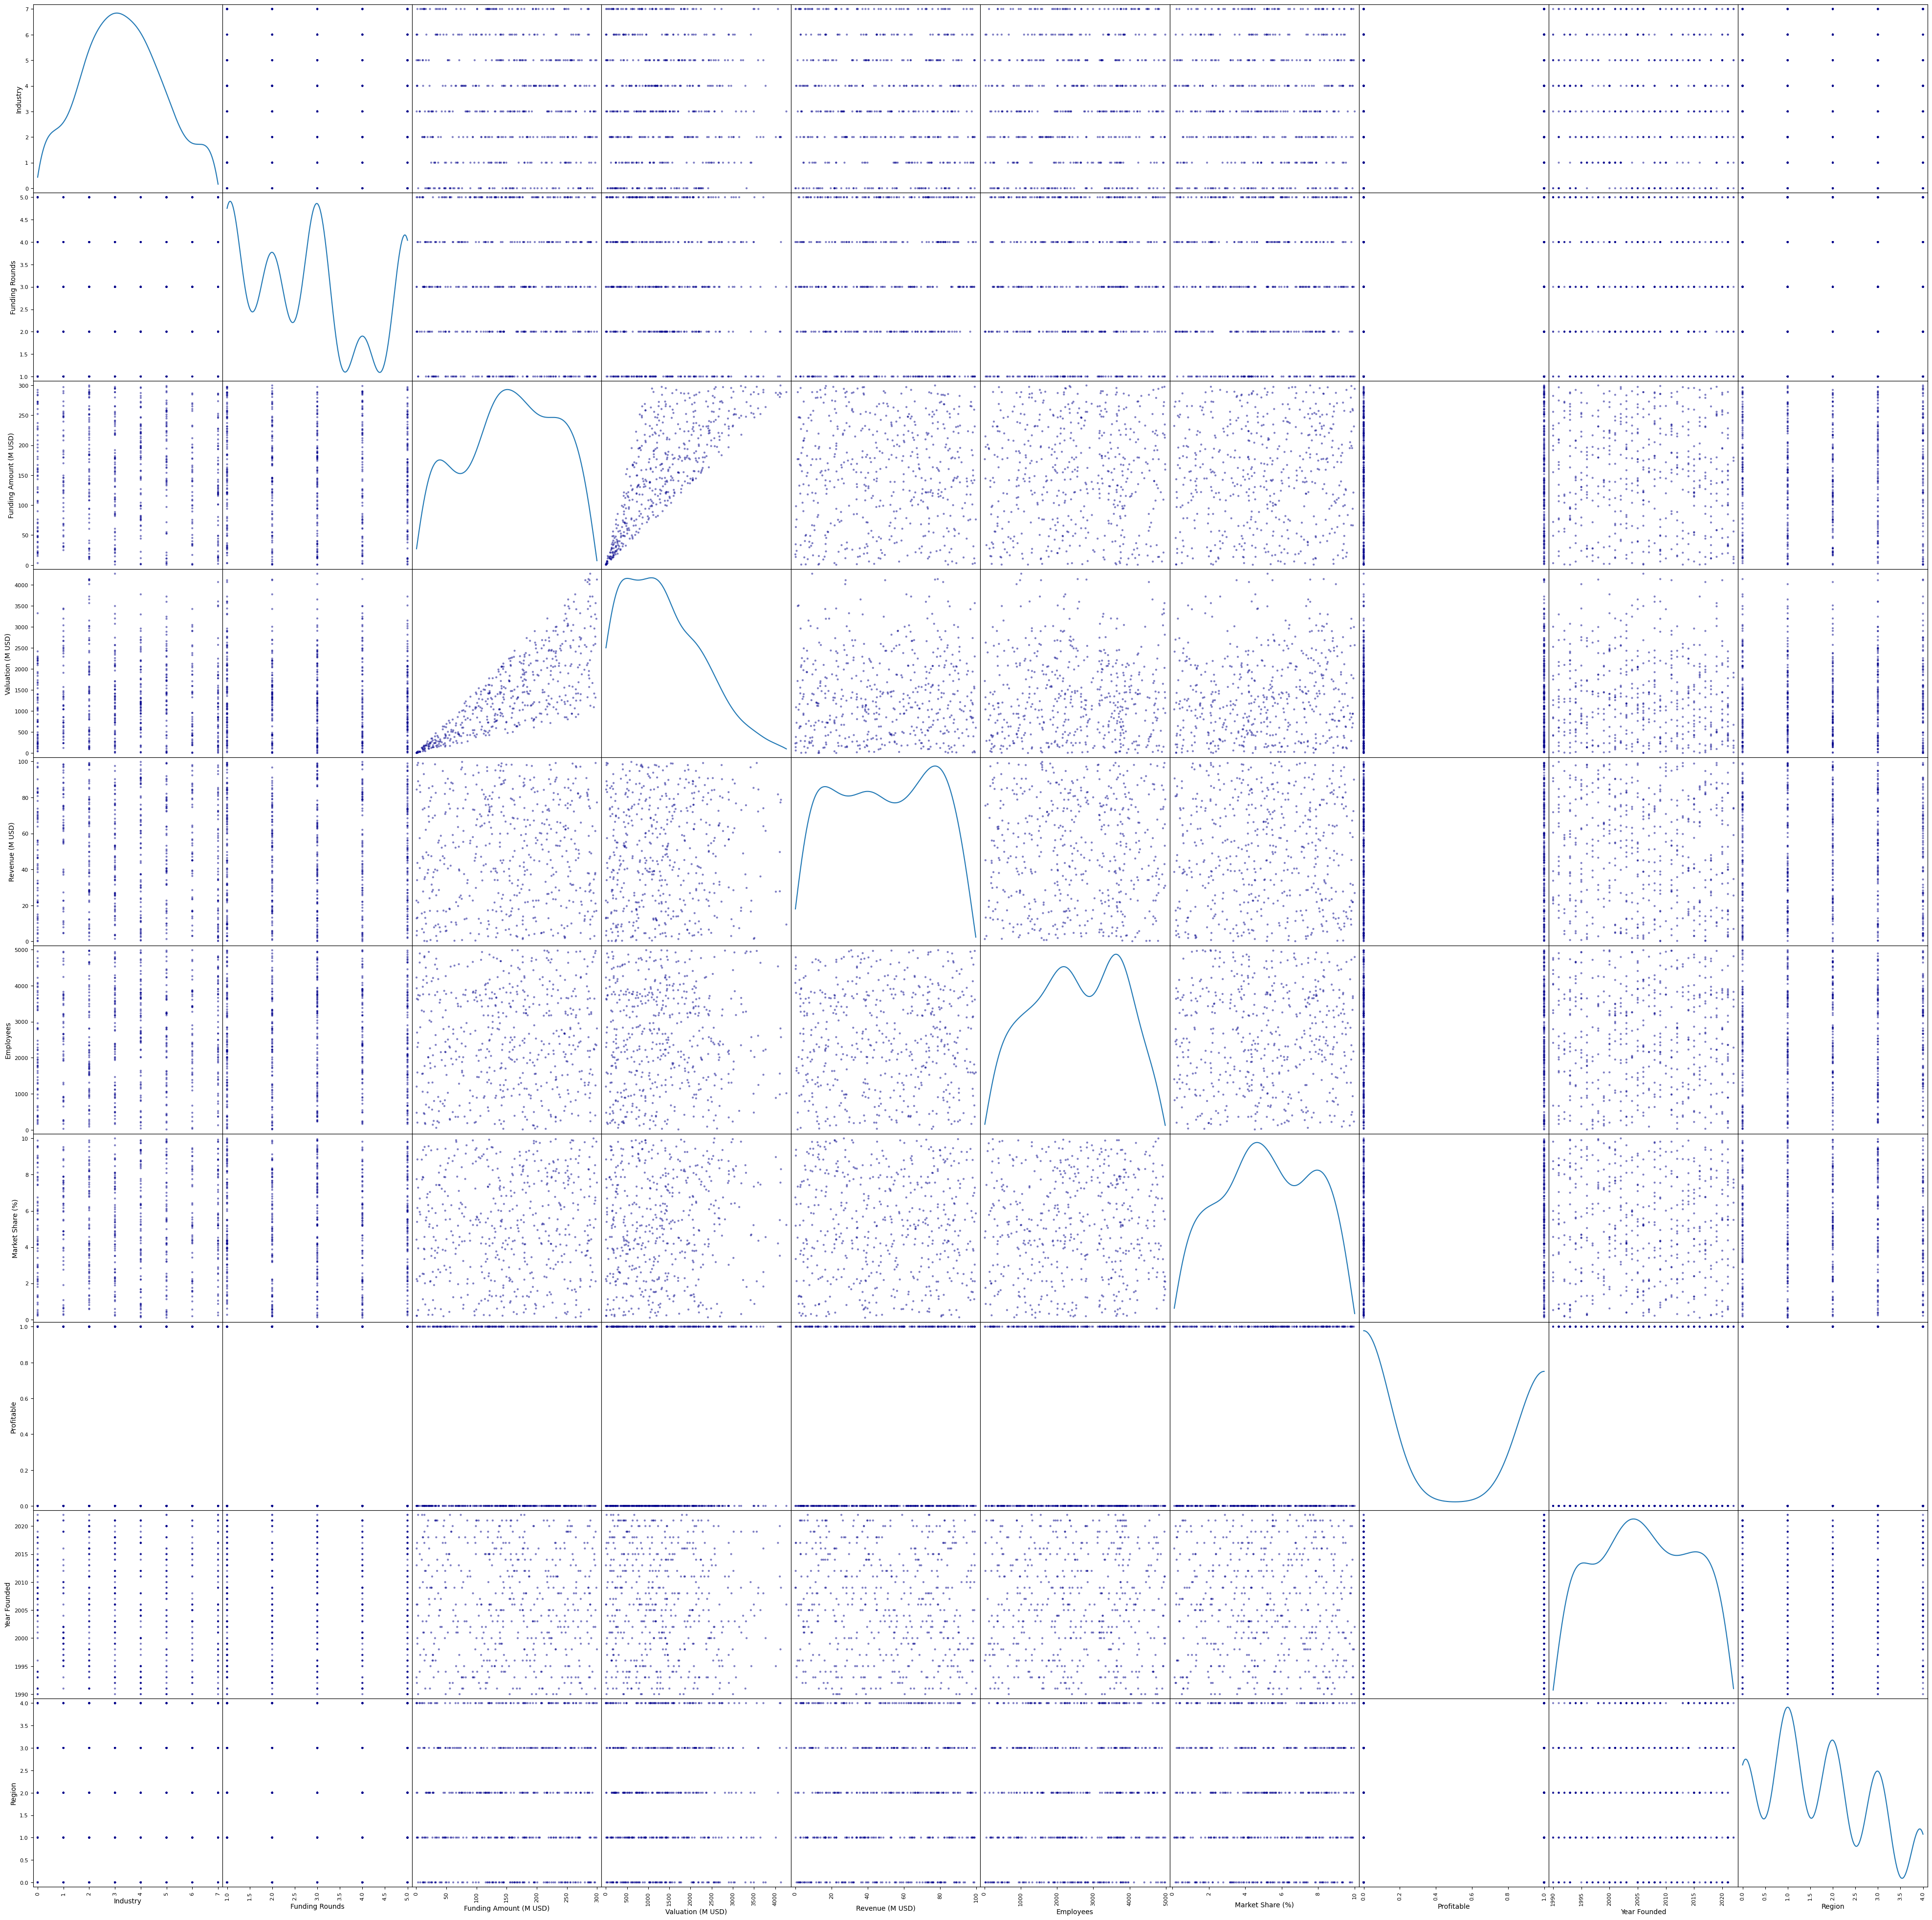

In [84]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, alpha = 0.5, figsize = (50, 50), diagonal = "kde", c="#00008B");

## Fine-Tuning ##

Switch all classifiers to regressors when dealing with quantitative data predictions (i.e. temperature, pay, etc.)

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.9549   | 8.116     | 19.06     | 15.18     |
| 2         | -0.975    | 12.37     | 3.964     | 4.808     |
| 3         | -0.9549   | 2.104     | 17.46     | 12.82     |
| 4         | -0.9651   | 14.45     | 1.391     | 19.46     |
| 5         | -0.9449   | 16.82     | 5.034     | 5.273     |
| 6         | -0.9449   | 4.485     | 6.781     | 11.45     |
| 7         | -0.9449   | 4.317     | 6.435     | 11.3      |
| 8         | -0.9449   | 19.73     | 5.37      | 5.876     |
| 9         | -0.9449   | 18.79     | 8.39      | 3.556     |
| 10        | -0.9751   | 19.82     | 4.168     | 2.04      |
| 11        | -0.9449   | 18.08     | 7.568     | 6.571     |
| 12        | -0.9751   | 18.33     | 4.144     | 8.632     |
| 13        | -0.9449   | 17.28     | 7.027     | 4.882     |
| 14        | -0.9449   | 19.91     | 8.969     | 6.048     |
| 15    

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -1.075    | 8.116     | 19.06     | 15.18     |
| 2         | -1.526    | 12.37     | 3.964     | 4.808     |
| 3         | -0.9346   | 2.104     | 17.46     | 12.82     |
| 4         | -1.534    | 14.45     | 1.391     | 19.46     |
| 5         | -1.537    | 16.82     | 5.034     | 5.273     |
| 6         | -1.135    | 4.485     | 6.781     | 11.45     |
| 7         | -0.9346   | 1.51      | 19.99     | 2.605     |
| 8         | -0.9446   | 1.415     | 11.15     | 19.95     |
| 9         | -0.9346   | 1.07      | 19.59     | 19.83     |
| 10        | -0.9446   | 1.059     | 14.29     | 3.379     |
| 11        | -0.9346   | 1.308     | 19.29     | 8.713     |
| 12        | -0.9446   | 1.032     | 12.6      | 15.74     |
| 13        | -1.075    | 19.32     | 19.77     | 2.067     |
| 14        | -0.9446   | 1.125     | 3.058     | 19.44     |
| 15    

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=100, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 100 folds for each of 28 candidates, totalling 2800 fits
{'n_neighbors': 24}


## Training Model ##

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.71


In [198]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 17, min_samples_split = 12, random_state=42).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.65


In [244]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=22).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model3, "Startup.joblib")
    model = joblib.load("Startup.joblib")

Accuracy: 0.71


In [226]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
import joblib


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
model4 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3).fit(X_train, y_train)

predictions = model4.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {score}")

#Save Model
if score >= 0.7:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

## Post-Training Analysis ##

In [204]:
y_predicted = model.predict(X_test)

In [206]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  0, 21],
       [ 0,  0,  8],
       [ 0,  0, 71]])

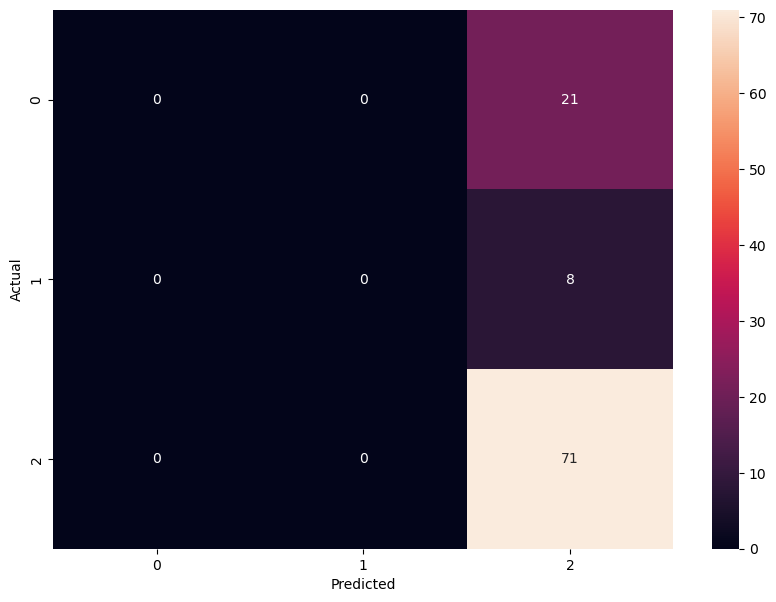

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

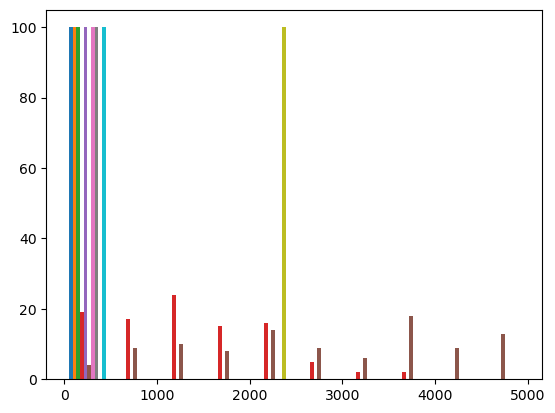

In [260]:
plt.hist(X_test)
plt.show()

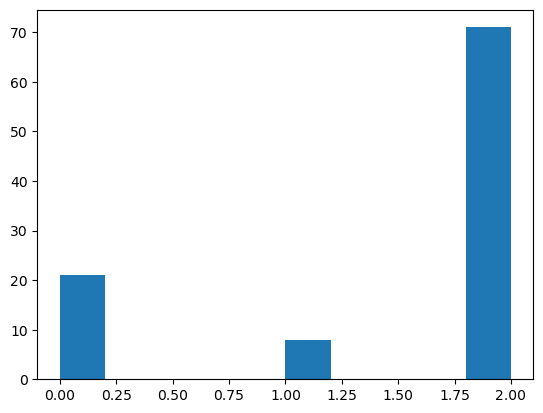

In [258]:
plt.hist(y_test)
plt.show()

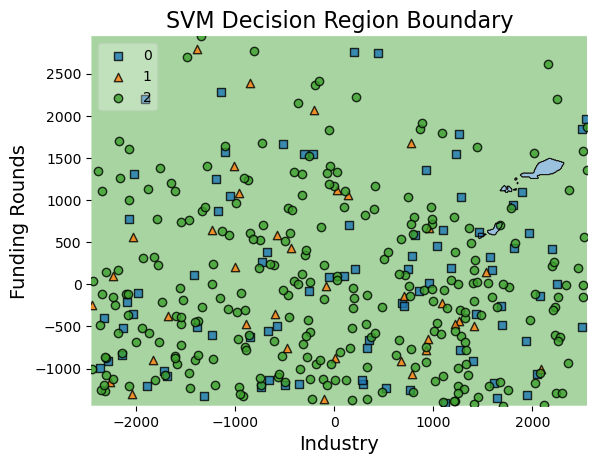

<Figure size 10000x10000 with 0 Axes>

In [246]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
#If the model is a KNN use this for visualization

clf = model
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, np.array(y_train), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title("SVM Decision Region Boundary", size=16)
plt.figure(figsize=(100, 100))
plt.show()